# Packages used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!conda list

# packages in environment at /Users/douglas/anaconda3/envs/jupyter_venv:
#
# Name                    Version                   Build  Channel
anyio                     4.2.0           py312hecd8cb5_0  
appnope                   0.1.3           py312hecd8cb5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py312h6c40b1e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-lru                 2.0.4           py312hecd8cb5_0  
attrs                     23.1.0          py312hecd8cb5_0  
babel                     2.11.0          py312hecd8cb5_0  
beautifulsoup4            4.12.3          py312hecd8cb5_0  
blas                      1.0                    openblas  
bleach                    4.1.0              pyhd3eb1b0_0  
bottleneck                1.3.7           py312h32608ca_0  
brotli                    1.0.9                h6c40b1e_8  
brotli-bin                1.0.9                h6c40b1e_8  
brotli-python  

# Load Data

In [3]:
# Load the entire Excel file
file_path = 'NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)

# Print the sheet names to see what sheets are available
print(xls.sheet_names)

# Load a sheet into a DataFrame by sheet name
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header = 1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header = 1)



['week5_before_intervention', 'week13_after_intervention']


In [ ]:
# Display the first few rows of each sheet
print("Week 5 Before Intervention:")
print(df_week5_before.head())


In [5]:
df_week5_before.columns

Index(['name', 'Age', 'Gender', 'Body weight ', 'Body height ', 'BMI ',
       'Start group', 'fasting glucose', '2hr glucose', 'fasting insulin',
       'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
       'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
       'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
       'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2',
       'MCP1-D3'],
      dtype='object')

In [ ]:
# Get a statistical summary of the data
summary = df_week5_before.describe()
print(summary)


# Show data by Group (Gender, Start Group) week 5

In [7]:
# List of columns to compare
columns_to_compare = ['Age','Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                      'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                      'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                      'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select only the columns to compare along with the 'Gender' column
df_selected = df_week5_before[['Gender'] + columns_to_compare]

# Group by Gender and calculate the mean
gender_group_mean = df_selected.groupby('Gender').mean()

# Calculate the absolute delta between groups
delta = gender_group_mean.diff().iloc[1]
delta.name = 'Delta'

# Calculate the percentage difference between groups
percentage_delta = (delta / gender_group_mean.iloc[0]) * 100
percentage_delta.name = 'Percentage Delta'

# Combine the means, absolute deltas, and percentage deltas into a single DataFrame using pd.concat
combined = pd.concat([gender_group_mean, delta.to_frame().T, percentage_delta.to_frame().T])
print("\nCombined Data (Group Means, Deltas, and Percentage Deltas):")
print(combined)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



Combined Data (Group Means, Deltas, and Percentage Deltas):
                        Age  Body weight   Body height        BMI   \
Female            59.342857     77.188571      1.625229  28.884549   
Male              59.352941     91.402941      1.760529  29.510832   
Delta              0.010084     14.214370      0.135301   0.626283   
Percentage Delta   0.016993     18.415122      8.325035   2.168227   

                  fasting glucose  2hr glucose  fasting insulin  \
Female                   5.034286     5.700000        13.921612   
Male                     5.335294     6.564706        19.955399   
Delta                    0.301008     0.864706         6.033788   
Percentage Delta         5.979168    15.170279        43.341157   

                  fasting triglyceride    HOMA-IR    Matsuda        IGI  \
Female                        1.166286   3.157477  70.035969  24.217042   
Male                          1.395247   4.322860  45.326168  25.999372   
Delta                      

In [8]:
# List of columns to compare
columns_to_compare = ['Age','Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                      'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                      'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                      'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select only the columns to compare along with the 'Gender' column
df_selected = df_week5_before[['Start group'] + columns_to_compare]

# Group by Gender and calculate the mean
gender_group_mean = df_selected.groupby('Start group').mean()

# Calculate the absolute delta between groups
delta = gender_group_mean.diff().iloc[1]
delta.name = 'Delta'

# Calculate the percentage difference between groups
percentage_delta = (delta / gender_group_mean.iloc[0]) * 100
percentage_delta.name = 'Percentage Delta'

# Combine the means, absolute deltas, and percentage deltas into a single DataFrame using pd.concat
combined = pd.concat([gender_group_mean, delta.to_frame().T, percentage_delta.to_frame().T])
print("\nCombined Data (Group Means, Deltas, and Percentage Deltas):")
print(combined)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



Combined Data (Group Means, Deltas, and Percentage Deltas):
                                        Age  Body weight   Body height   \
A=CR=CaloricRestrict=Weight loss  59.307692     84.523077      1.693769   
B=ctrl=Weight maintenance         59.400000     83.763333      1.689467   
Delta                              0.092308     -0.759744     -0.004303   
Percentage Delta                   0.155642     -0.898859     -0.254023   

                                       BMI   fasting glucose  2hr glucose  \
A=CR=CaloricRestrict=Weight loss  29.219727         5.200000     6.089744   
B=ctrl=Weight maintenance         29.158605         5.160000     6.173333   
Delta                             -0.061122        -0.040000     0.083590   
Percentage Delta                  -0.209181        -0.769231     1.372632   

                                  fasting insulin  fasting triglyceride  \
A=CR=CaloricRestrict=Weight loss        15.147735              1.313077   
B=ctrl=Weight maintenance  

# Matplotlib visualisations of Boxplots and Scatterplots

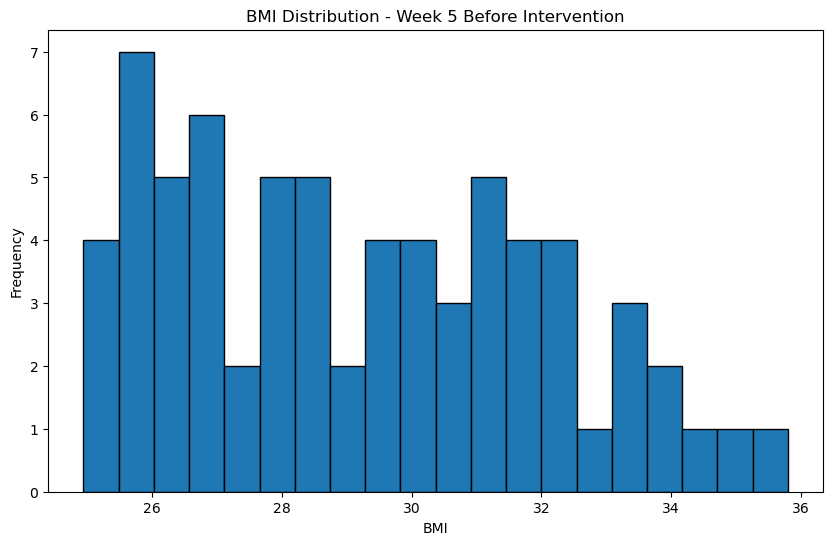

In [9]:
import matplotlib.pyplot as plt

# Plot BMI distribution
plt.figure(figsize=(10, 6))
plt.hist(df_week5_before['BMI '].dropna(), bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution - Week 5 Before Intervention')
plt.show()



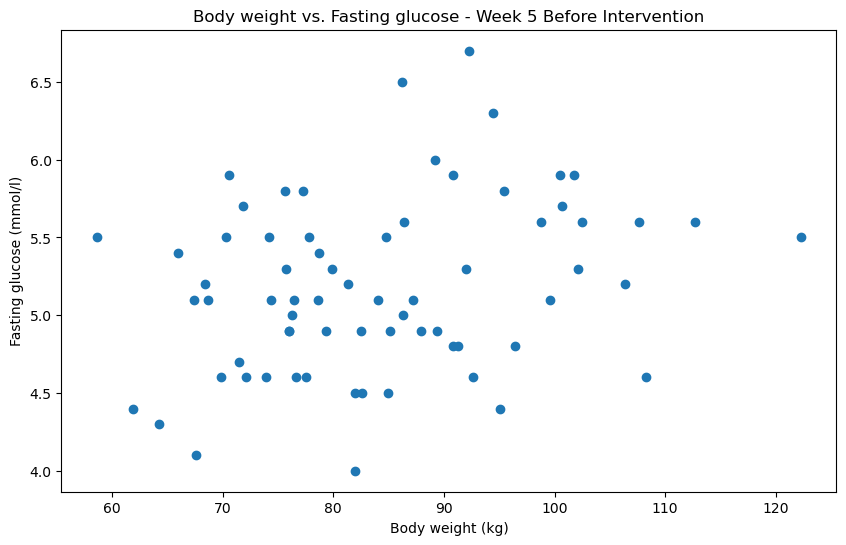

In [10]:
# Scatter plot of Body weight vs. Fasting glucose
plt.figure(figsize=(10, 6))
plt.scatter(df_week5_before['Body weight '], df_week5_before['fasting glucose'])
plt.xlabel('Body weight (kg)')
plt.ylabel('Fasting glucose (mmol/l)')
plt.title('Body weight vs. Fasting glucose - Week 5 Before Intervention')
plt.show()

# Merge data for further visualisations

In [11]:
# Ensure 'name' is a column 
df_week5_before.reset_index(inplace=True)
df_week13_after.reset_index(inplace=True)

# Merge the dataframes on 'name'
merged_df = pd.merge(df_week5_before, df_week13_after, on='name', suffixes=('_week5', '_week13'))



In [12]:
merged_df.columns

Index(['index_week5', 'name', 'Age_week5', 'Gender_week5',
       'Body weight _week5', 'Body height _week5', 'BMI _week5',
       'Start group_week5', 'fasting glucose_week5', '2hr glucose_week5',
       'fasting insulin_week5', 'fasting triglyceride_week5', 'HOMA-IR_week5',
       'Matsuda_week5', 'IGI_week5', 'CRP-D1_week5', 'E-Selectin-D1_week5',
       'IL18-D1_week5', 'IL1b-D1_week5', 'TNF-alpha-D1_week5',
       'VCAM-1-D1_week5', 'adiponectin-D1_week5', 'ICAM-D2_week5',
       'ICAM1-D3_week5', 'IL1-D2_week5', 'IL1-D3_week5', 'IL10-D2_week5',
       'IL10-D3_week5', 'IL6-D2_week5', 'IL6-D3_week5', 'IL8-D2_week5',
       'IL8-D3_week5', 'MCP1-D2_week5', 'MCP1-D3_week5', 'index_week13',
       'Age_week13', 'Gender_week13', 'Body weight _week13',
       'Body height _week13', 'BMI _week13', 'Start group_week13',
       'fasting glucose_week13', '2hr glucose_week13',
       'fasting insulin_week13', 'fasting triglyceride_week13',
       'HOMA-IR_week13', 'Matsuda_week13', 'IGI_wee

In [ ]:
# Calculate change in BMI
merged_df['BMI_change'] = merged_df['BMI _week13'] - merged_df['BMI _week5']

# Calculate change in fasting glucose
merged_df['fasting_glucose_change'] = merged_df['fasting glucose_week13'] - merged_df['fasting glucose_week5']

print(merged_df[['name', 'BMI_change', 'fasting_glucose_change']].head())


# Heatmap 

In [ ]:
# Load your data
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)

# Set 'name' as the index
df_week5_before.set_index('name', inplace=True)
df_week13_after.set_index('name', inplace=True)

# Calculate correlation matrix
# Select only numeric columns
numeric_df_week5_before = df_week5_before.select_dtypes(include=[float, int])
numeric_df_week13_after = df_week13_after.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix_week5 = numeric_df_week5_before.corr()
correlation_matrix_week13 = numeric_df_week13_after.corr()


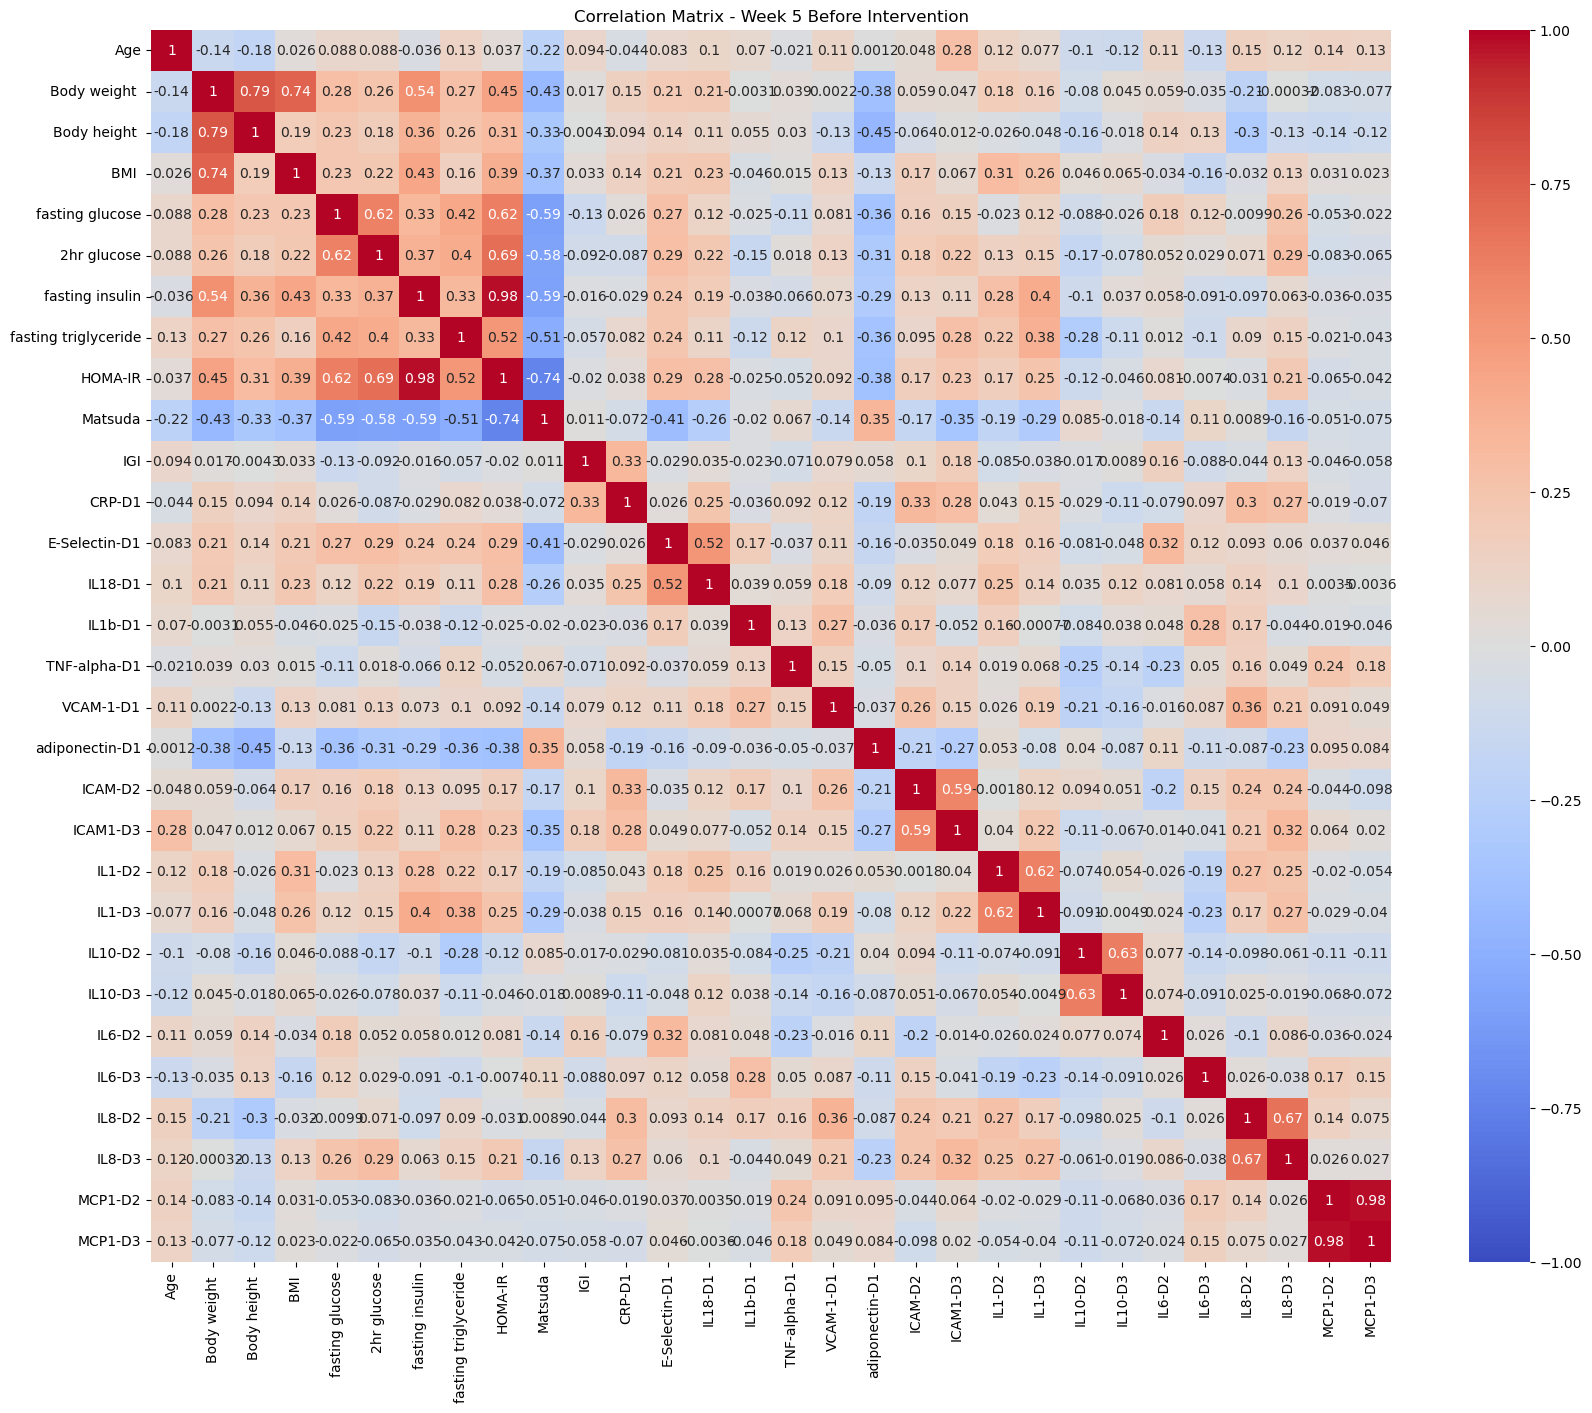

In [16]:
# Visualize the correlation matrix for Week 5 Before Intervention
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_week5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Week 5 Before Intervention')
plt.savefig('Correlation Matrix - Week 5 Before Intervention')
plt.show()


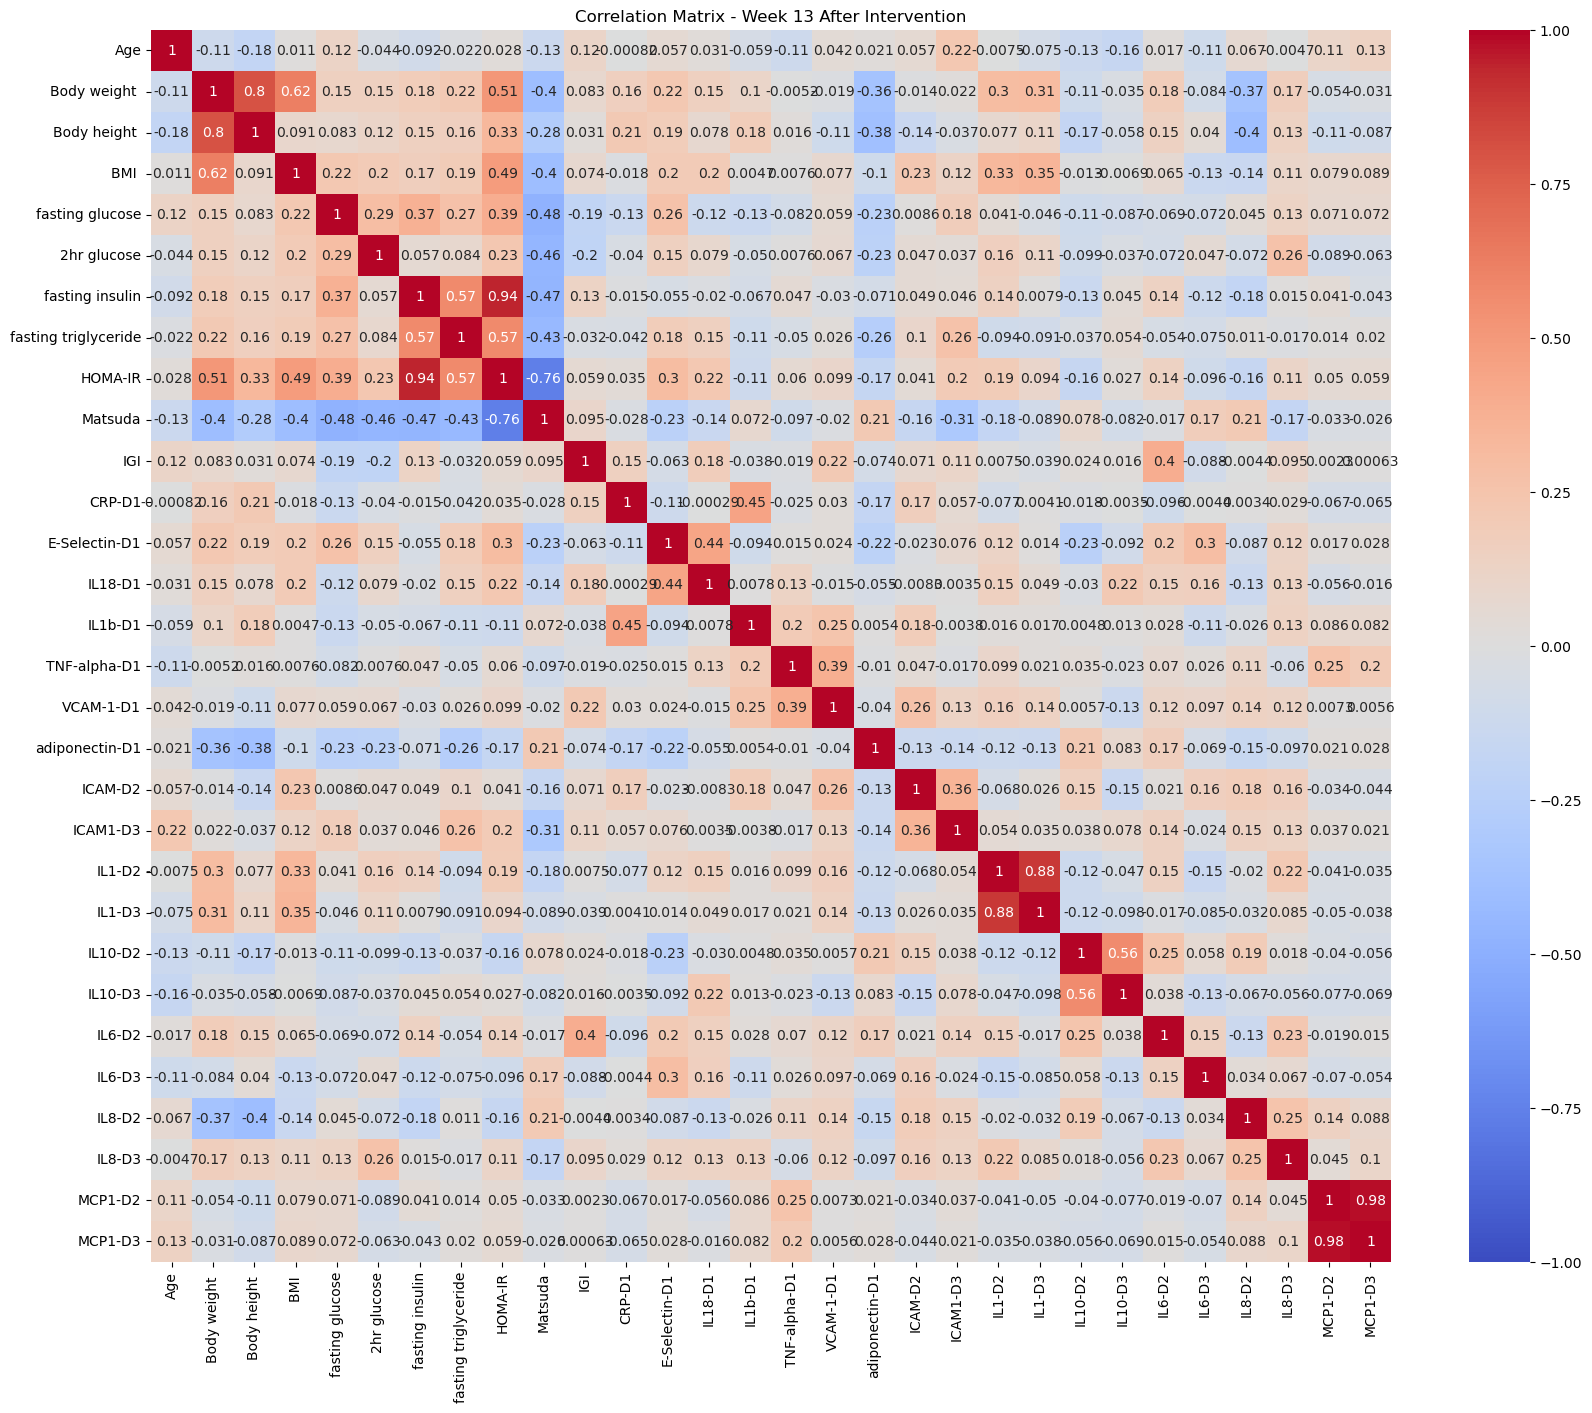

In [17]:


# Visualize the correlation matrix for Week 13 After Intervention
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_week13, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Week 13 After Intervention')
plt.savefig('Correlation Matrix - Week 13 After Intervention')
plt.show()




In [18]:
# Identify and print high correlations
high_corr_threshold = 0.6
high_corr_week5 = correlation_matrix_week5[(correlation_matrix_week5 > high_corr_threshold) | (correlation_matrix_week5 < -high_corr_threshold)]
print("High Correlations - Week 5 Before Intervention:")
print(high_corr_week5)

high_corr_week13 = correlation_matrix_week13[(correlation_matrix_week13 > high_corr_threshold) | (correlation_matrix_week13 < -high_corr_threshold)]
print("\nHigh Correlations - Week 13 After Intervention:")
print(high_corr_week13)

High Correlations - Week 5 Before Intervention:
                      Age  Body weight   Body height       BMI   \
Age                   1.0           NaN           NaN       NaN   
Body weight           NaN      1.000000        0.7885  0.736579   
Body height           NaN      0.788500        1.0000       NaN   
BMI                   NaN      0.736579           NaN  1.000000   
fasting glucose       NaN           NaN           NaN       NaN   
2hr glucose           NaN           NaN           NaN       NaN   
fasting insulin       NaN           NaN           NaN       NaN   
fasting triglyceride  NaN           NaN           NaN       NaN   
HOMA-IR               NaN           NaN           NaN       NaN   
Matsuda               NaN           NaN           NaN       NaN   
IGI                   NaN           NaN           NaN       NaN   
CRP-D1                NaN           NaN           NaN       NaN   
E-Selectin-D1         NaN           NaN           NaN       NaN   
IL18-D1       

# Merge data, find averages for further visualisations

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the entire Excel file with correct header row
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)

# Load a sheet into a DataFrame by specifying the correct header row
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)




In [ ]:
# Ensure 'units' is a column (if it was an index, reset it)
df_week5_before.reset_index(inplace=True, drop=True)
df_week13_after.reset_index(inplace=True, drop=True)

# Merge the dataframes on 'units'
merged_df = pd.merge(df_week5_before, df_week13_after, on='name', suffixes=('_week5', '_week13'))

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())


# Boxplots of all relevant columns with average and delta

In [21]:
# Load your data
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)


df_week5_before.columns

Index(['name', 'Age', 'Gender', 'Body weight ', 'Body height ', 'BMI ',
       'Start group', 'fasting glucose', '2hr glucose', 'fasting insulin',
       'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
       'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
       'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
       'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2',
       'MCP1-D3'],
      dtype='object')

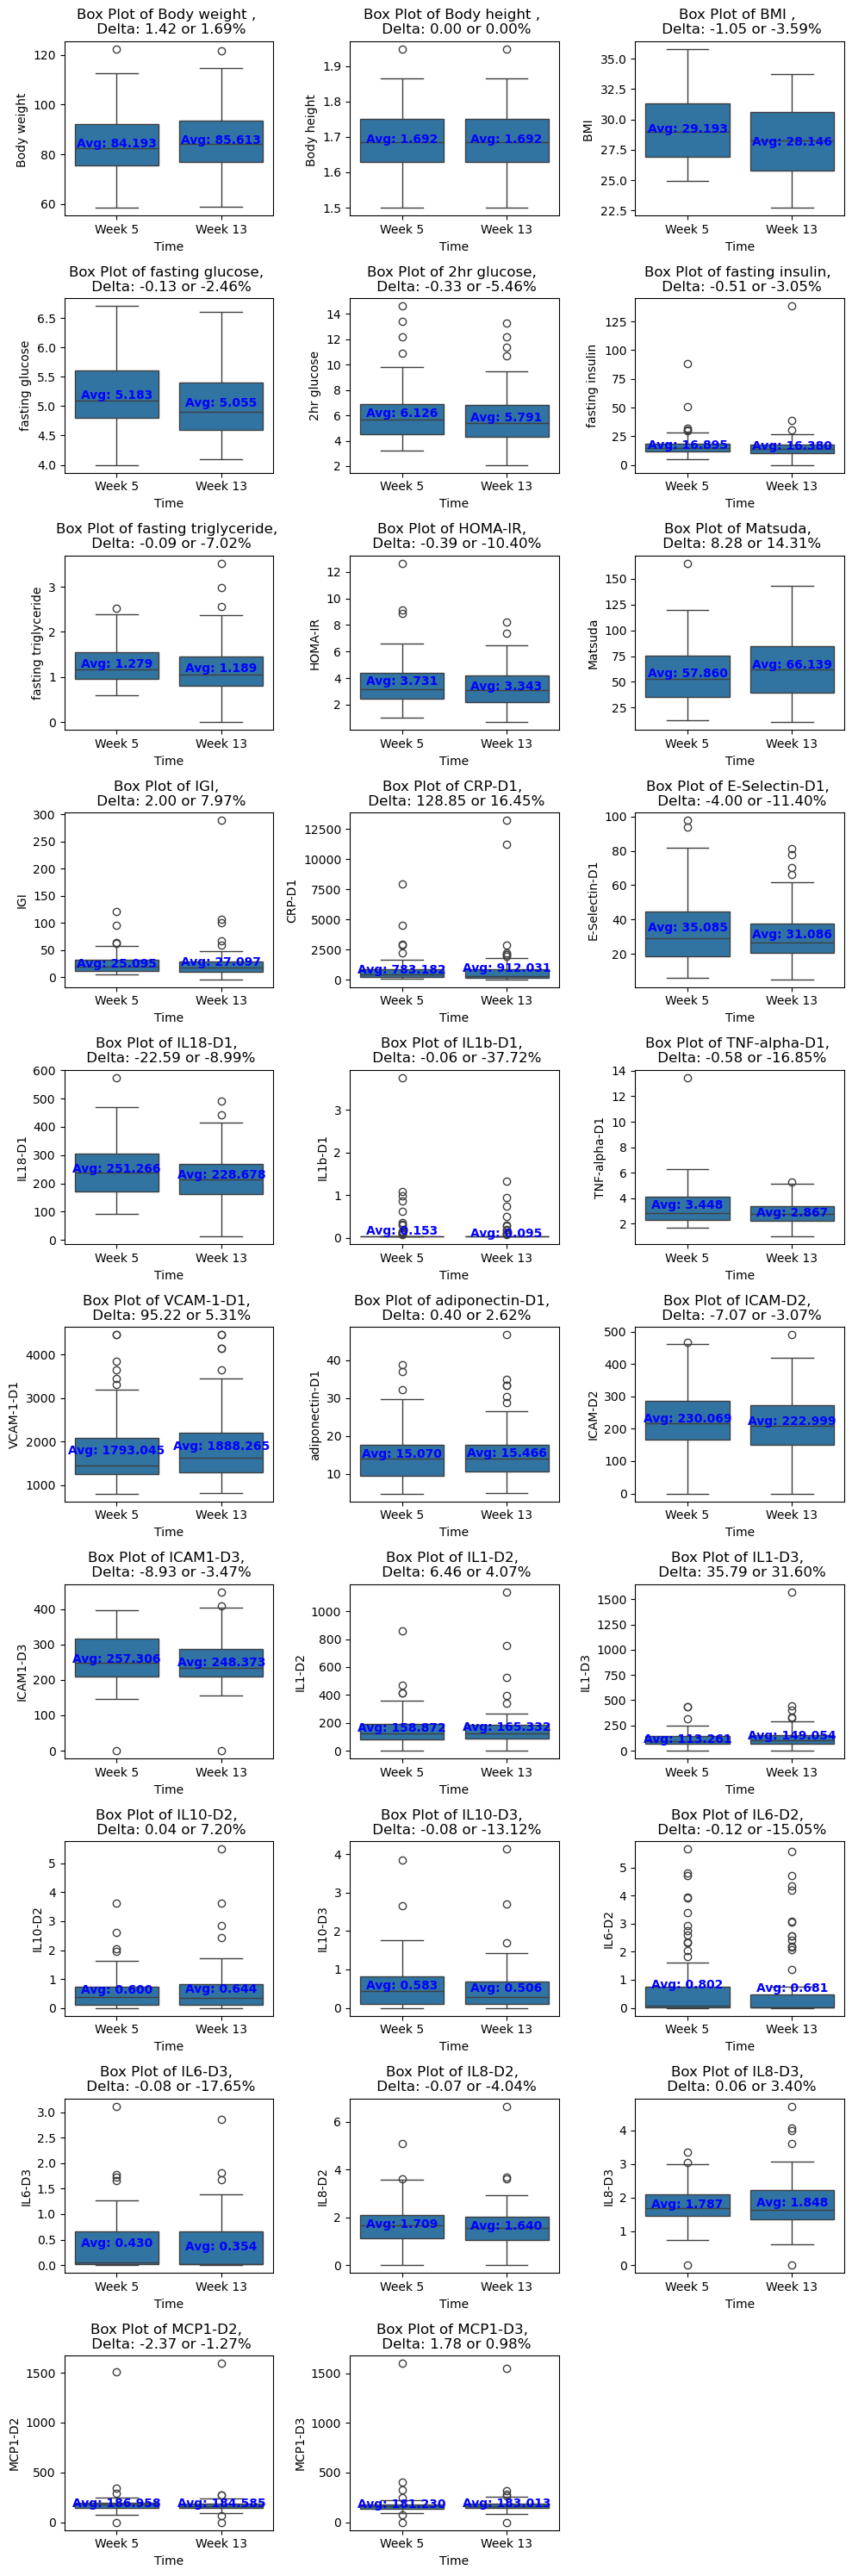

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]
df_week13_after = df_week13_after.loc[:, ~df_week13_after.columns.duplicated()]

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                     'E-Selectin-D1',  'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
       'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
       'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Combine the two dataframes for easier plotting
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'
combined_df = pd.concat([df_week5_before, df_week13_after], ignore_index=True)

# Create figure with a specific size
plt.figure(figsize=(10, 30))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(10, 3, i)
    
    # Data for Week 5
    data_week5 = combined_df[combined_df['Time'] == 'Week 5'][column].dropna()
    
    # Data for Week 13
    data_week13 = combined_df[combined_df['Time'] == 'Week 13'][column].dropna()
    
    # Calculate means
    avg_week5 = data_week5.mean()
    avg_week13 = data_week13.mean()
    
    # Calculate delta
    delta = avg_week13 - avg_week5
    percentage_delta = (delta / avg_week5) * 100
    
    # Creating box plots
    sns.boxplot(x='Time', y=column, data=combined_df)
    
    # Set title and labels, including delta in the title
    plt.title(f'Box Plot of {column}, \n Delta: {delta:.2f} or {percentage_delta:.2f}%')
    plt.xlabel('Time')
    plt.ylabel(column)
    
    # Annotate averages within the plot
    plt.text(0, avg_week5, f'Avg: {avg_week5:.3f}', horizontalalignment='center', verticalalignment='center', color='blue', weight='semibold')
    plt.text(1, avg_week13, f'Avg: {avg_week13:.3f}', horizontalalignment='center', verticalalignment='center', color='blue', weight='semibold')

# Adjust layout to prevent overlap
plt.tight_layout()



# Show the plot
plt.show()

# Week 5 Boxplots with weeks split by 'Start group'
## Boxplots of Nutritech data week 5 vs week 13 , both weeks split by Start group

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


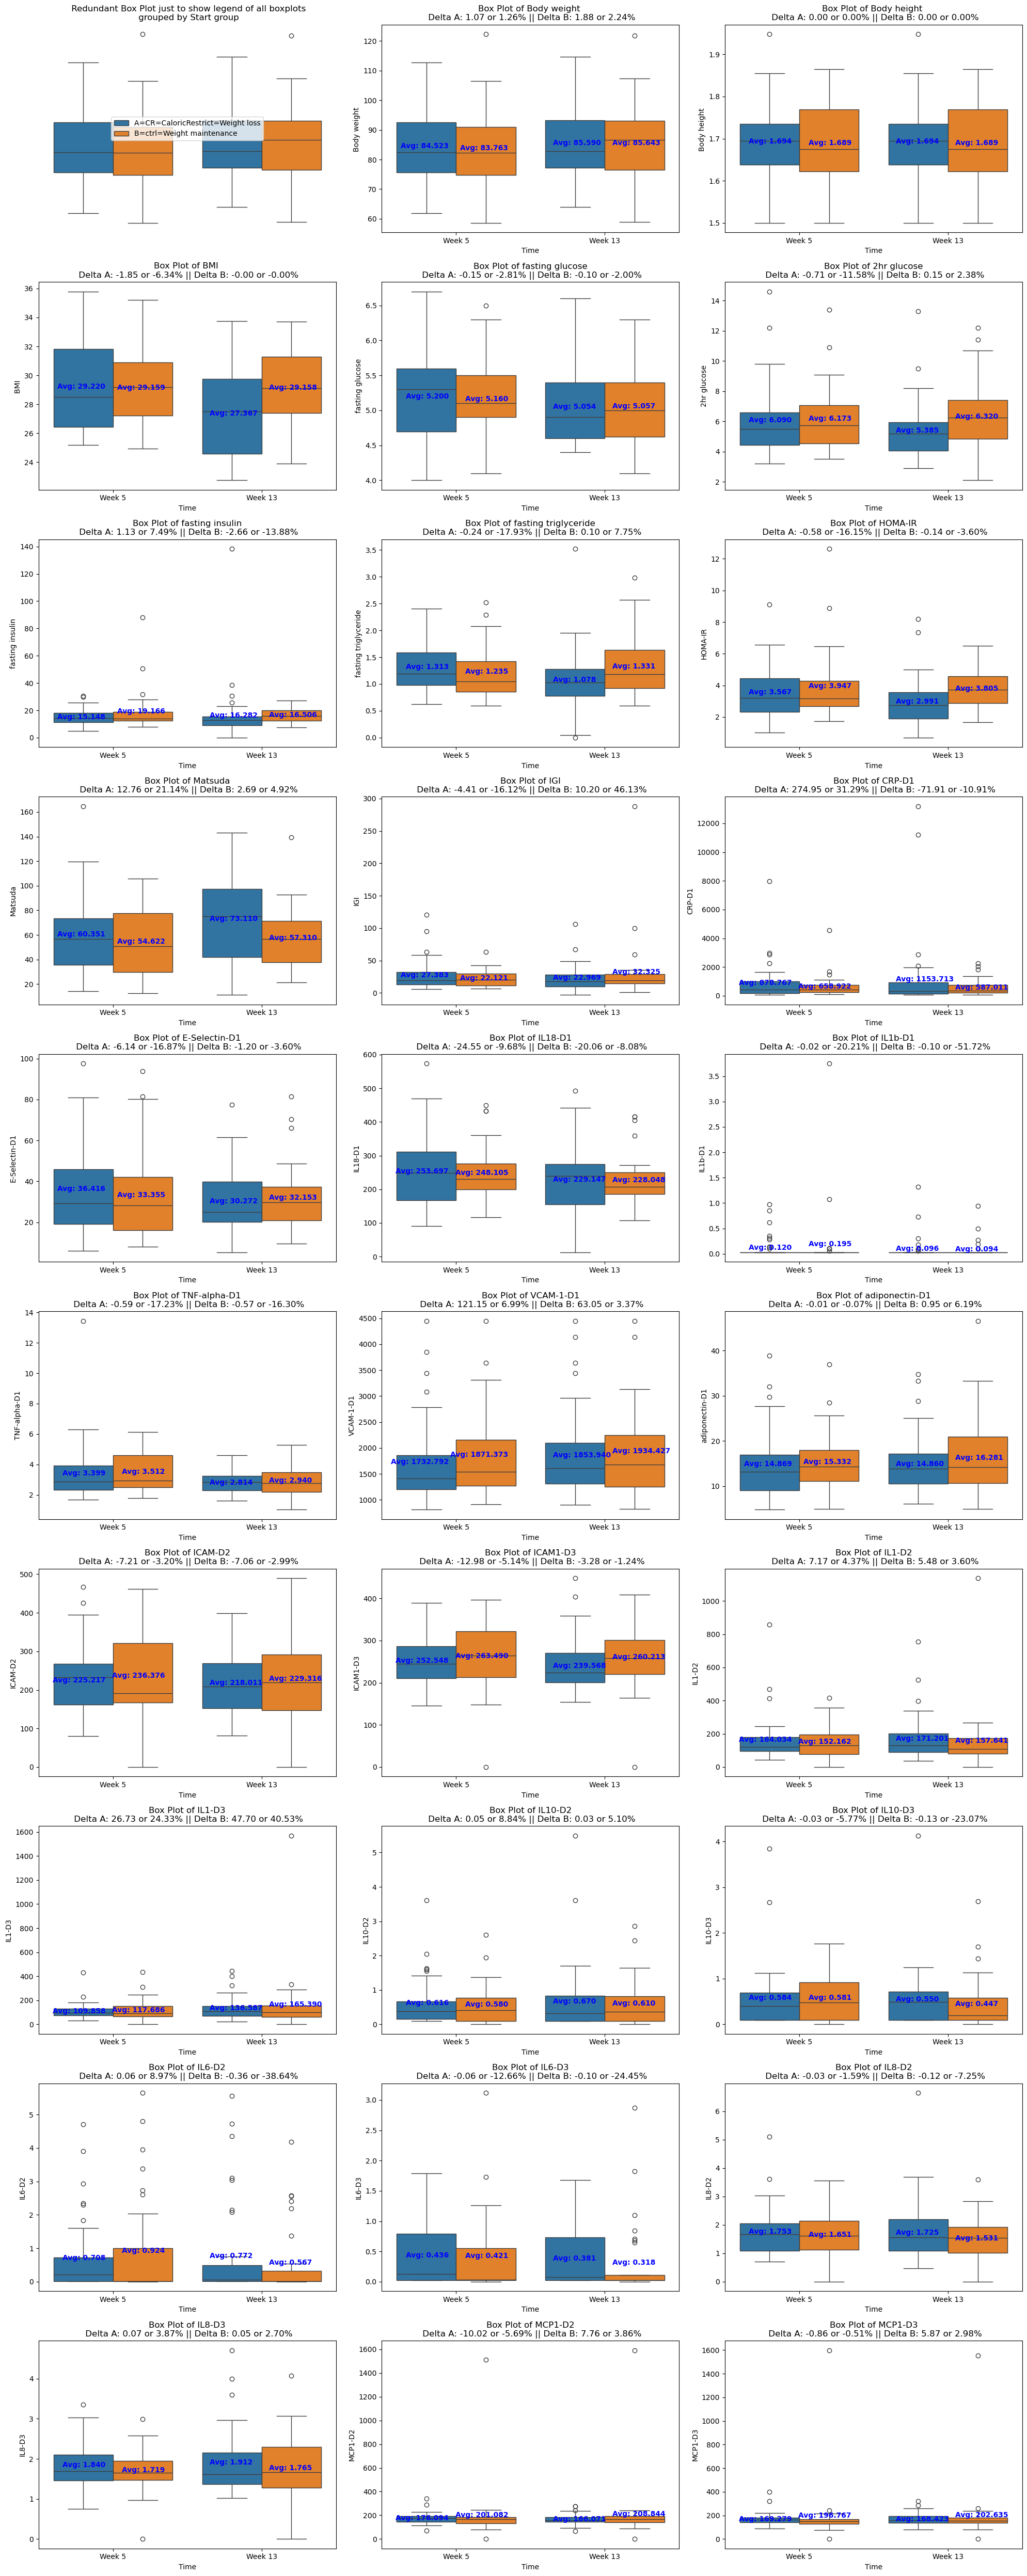

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]
df_week13_after = df_week13_after.loc[:, ~df_week13_after.columns.duplicated()]

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                     'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                     'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                     'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Combine the two dataframes for easier plotting
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'
combined_df = pd.concat([df_week5_before, df_week13_after], ignore_index=True)

# Calculate the number of rows needed
n_columns = 3
n_rows = (len(columns_to_compare) + 1 + n_columns - 1) // n_columns

# Create figure with a specific size
plt.figure(figsize=(20, 5 * n_rows))

# Add an empty plot at the start for the legend
plt.subplot(n_rows, n_columns, 1)
plt.title(f' Redundant Box Plot just to show legend of all boxplots\n grouped by Start group')
sns.boxplot(x='Time', y=columns_to_compare[0], hue='Start group', data=combined_df)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='center')
plt.axis('off')

for i, column in enumerate(columns_to_compare, 2):
    plt.subplot(n_rows, n_columns, i)
    
    # Creating box plots
    box_plot = sns.boxplot(x='Time', y=column, hue='Start group', data=combined_df)
    
    # Calculate means
    group_means = combined_df.groupby(['Time', 'Start group'])[column].mean().unstack()

    # Remove the legend
    box_plot.get_legend().remove()
    
    # Calculate delta and percentage delta
    delta_A = group_means.loc['Week 13', 'A=CR=CaloricRestrict=Weight loss'] - group_means.loc['Week 5', 'A=CR=CaloricRestrict=Weight loss']
    delta_B = group_means.loc['Week 13', 'B=ctrl=Weight maintenance'] - group_means.loc['Week 5', 'B=ctrl=Weight maintenance']
    percentage_delta_A = (delta_A / group_means.loc['Week 5', 'A=CR=CaloricRestrict=Weight loss']) * 100
    percentage_delta_B = (delta_B / group_means.loc['Week 5', 'B=ctrl=Weight maintenance']) * 100
    
    # Annotate averages and deltas within the plot 
    plt.text(-.05, group_means.loc['Week 5', 'A=CR=CaloricRestrict=Weight loss'], f'Avg: {group_means.loc["Week 5", "A=CR=CaloricRestrict=Weight loss"]:.3f}', horizontalalignment='right', verticalalignment='center', color='blue', weight='semibold')
    plt.text(.35, group_means.loc['Week 5', 'B=ctrl=Weight maintenance'], f'Avg: {group_means.loc["Week 5", "B=ctrl=Weight maintenance"]:.3f}', horizontalalignment='right', verticalalignment='center', color='blue', weight='semibold')
    plt.text(.65, group_means.loc['Week 13', 'A=CR=CaloricRestrict=Weight loss'], f'Avg: {group_means.loc["Week 13", "A=CR=CaloricRestrict=Weight loss"]:.3f}', horizontalalignment='left', verticalalignment='center', color='blue', weight='semibold')
    plt.text(1.05, group_means.loc['Week 13', 'B=ctrl=Weight maintenance'], f'Avg: {group_means.loc["Week 13", "B=ctrl=Weight maintenance"]:.3f}', horizontalalignment='left', verticalalignment='center', color='blue', weight='semibold')
      
    plt.title(f'Box Plot of {column}\n Delta A: {delta_A:.2f} or {percentage_delta_A:.2f}% || Delta B: {delta_B:.2f} or {percentage_delta_B:.2f}%')
    plt.xlabel('Time')
    plt.ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

#plt.savefig('Boxplots of week 5 vs week 13 , both weeks split by Start group.png')

# Show the plot
plt.show()


## Boxplots of Nutritech data week 5 vs week 13 (split by Start group¶)

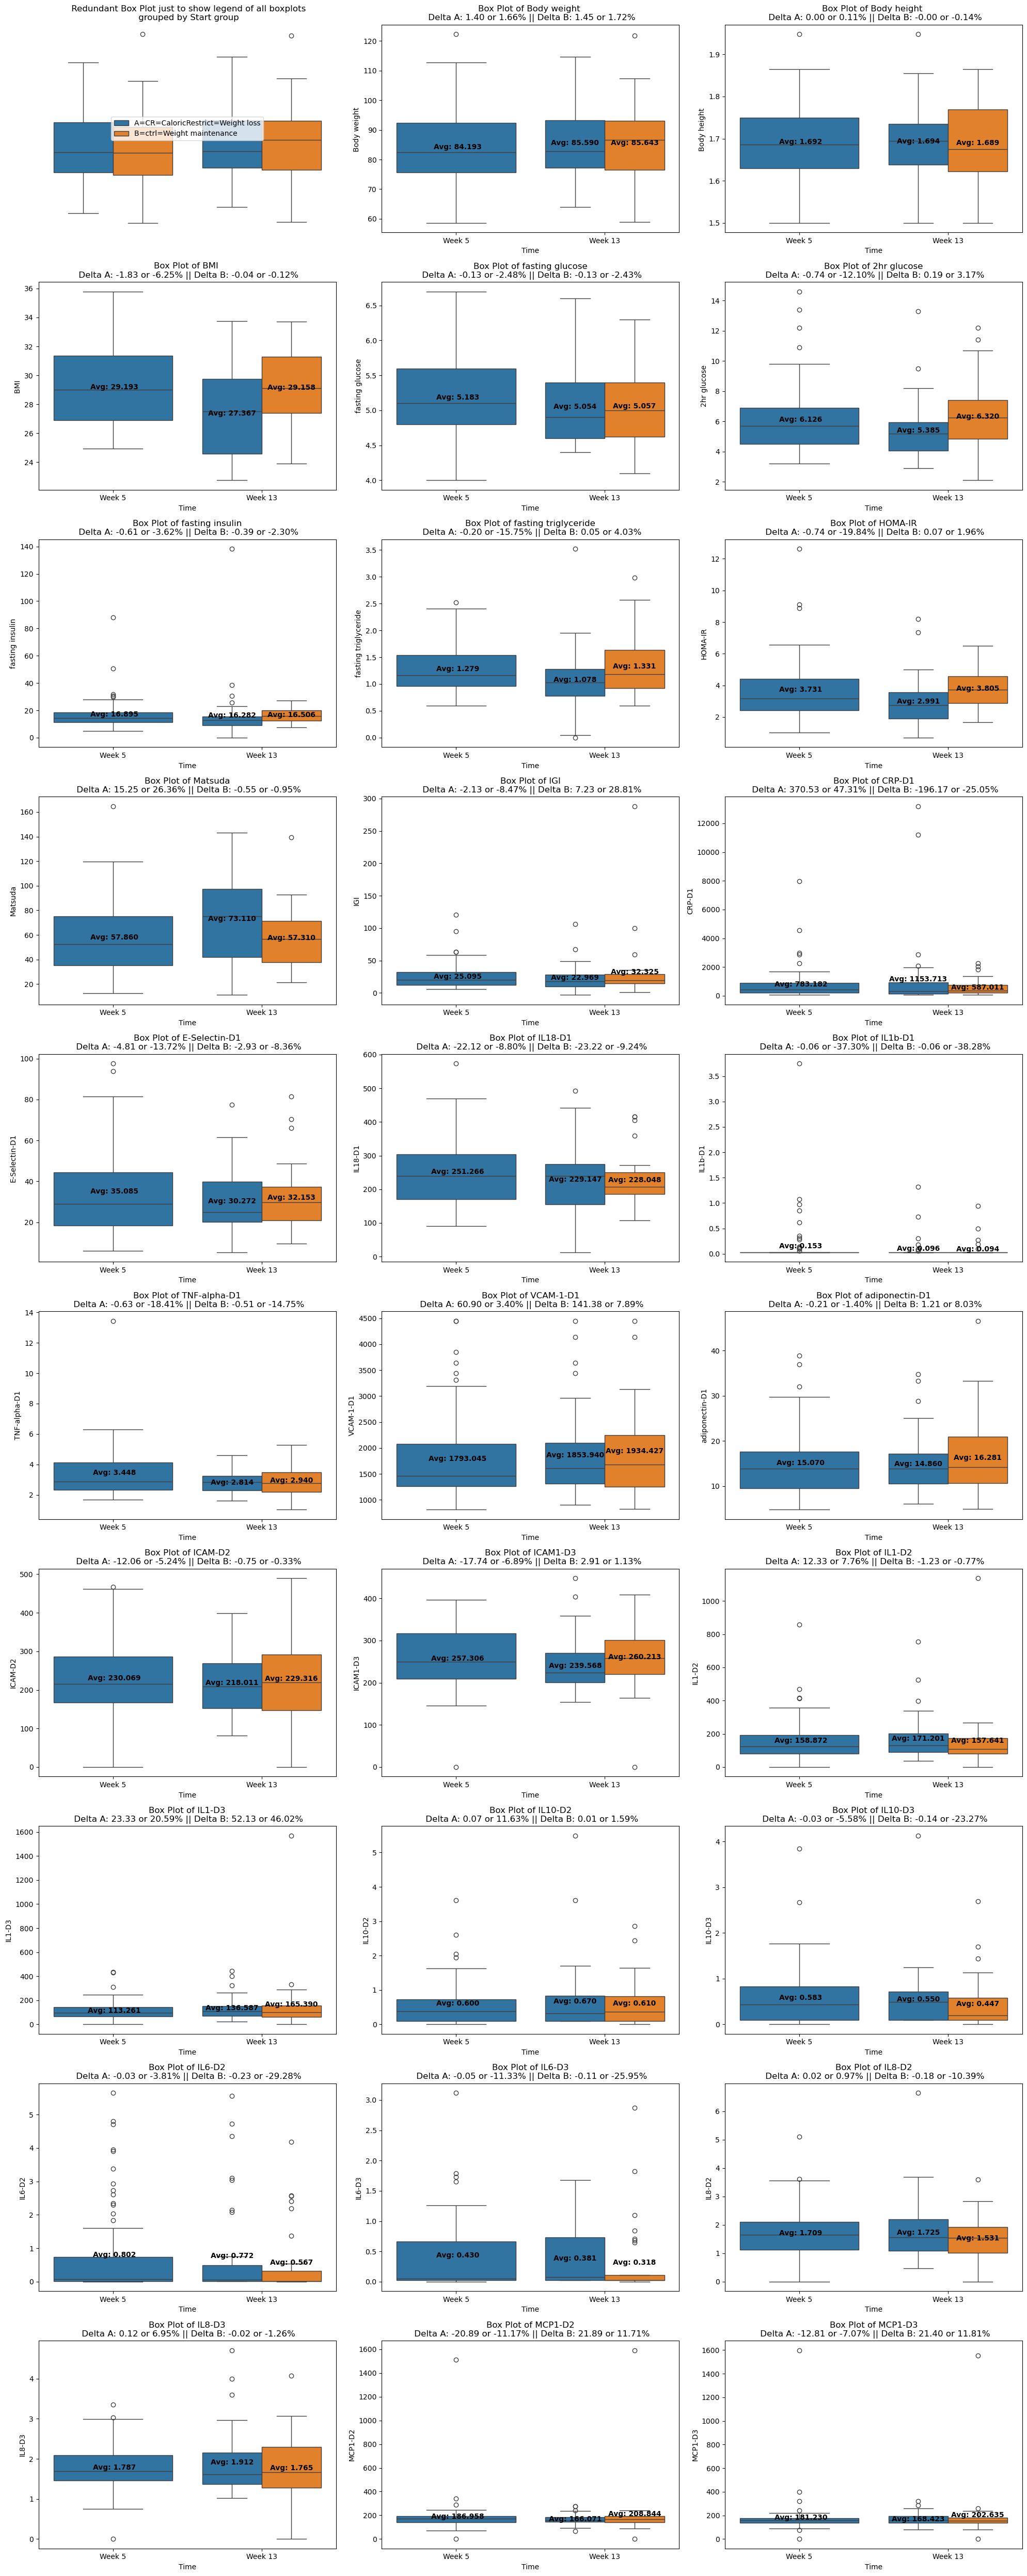

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]
df_week13_after = df_week13_after.loc[:, ~df_week13_after.columns.duplicated()]

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                     'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                     'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                     'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Combine the two dataframes for easier plotting
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'
combined_df = pd.concat([df_week5_before, df_week13_after], ignore_index=True)

# Calculate the number of rows needed
n_columns = 3
n_rows = (len(columns_to_compare) + n_columns - 1) // n_columns

# Calculate the number of rows needed
n_columns = 3
n_rows = (len(columns_to_compare) + 1 + n_columns - 1) // n_columns

# Create figure with a specific size
plt.figure(figsize=(20, 5 * n_rows))

# Add an empty plot at the start for the legend
plt.subplot(n_rows, n_columns, 1)
plt.title(f' Redundant Box Plot just to show legend of all boxplots\n grouped by Start group')
sns.boxplot(x='Time', y=columns_to_compare[0], hue='Start group', data=combined_df)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='center')
plt.axis('off')

for i, column in enumerate(columns_to_compare, 2):
    plt.subplot(n_rows, n_columns, i)
    
    # Data for Week 5
    data_week5 = combined_df[combined_df['Time'] == 'Week 5'][column].dropna()
    # Data for Week 13 split by Start group
    data_week13_group_A = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'A=CR=CaloricRestrict=Weight loss')][column].dropna()
    data_week13_group_B = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'B=ctrl=Weight maintenance')][column].dropna()
    
    # Calculate means
    avg_week5 = data_week5.mean()
    avg_week13_A = data_week13_group_A.mean()
    avg_week13_B = data_week13_group_B.mean()

    
    
    # Calculate delta
    delta_A = avg_week13_A - avg_week5
    delta_B = avg_week13_B - avg_week5
    percentage_delta_A = (delta_A / avg_week5) * 100
    percentage_delta_B = (delta_B / avg_week5) * 100
    
    # Creating box plots
    box_plot=sns.boxplot(x='Time', y=column, data=combined_df[combined_df['Time'] == 'Week 5'])
    box_plot=sns.boxplot(x='Time', y=column, hue='Start group', data=combined_df[combined_df['Time'] == 'Week 13'])
    
    # remove legend
    box_plot.get_legend().remove()
    
    # Set title and labels, including delta in the title
    plt.title(f'Box Plot of {column}\n Delta A: {delta_A:.2f} or {percentage_delta_A:.2f}% || Delta B: {delta_B:.2f} or {percentage_delta_B:.2f}%')
    plt.xlabel('Time')
    plt.ylabel(column)
    
    # Annotate averages within the plot
    plt.text(.01, avg_week5, f'Avg: {avg_week5:.3f}', horizontalalignment='center', verticalalignment='center', weight='semibold')
    plt.text(.8, avg_week13_A, f'Avg: {avg_week13_A:.3f}', horizontalalignment='center', verticalalignment='center', weight='semibold')
    plt.text(1.2, avg_week13_B, f'Avg: {avg_week13_B:.3f}', horizontalalignment='center', verticalalignment='center', weight='semibold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure
# plt.savefig('Boxplots of week 5 vs week 13 (split by Start group) .png')

# Show the plot
plt.show()


# Week 5 split boxplots by gender

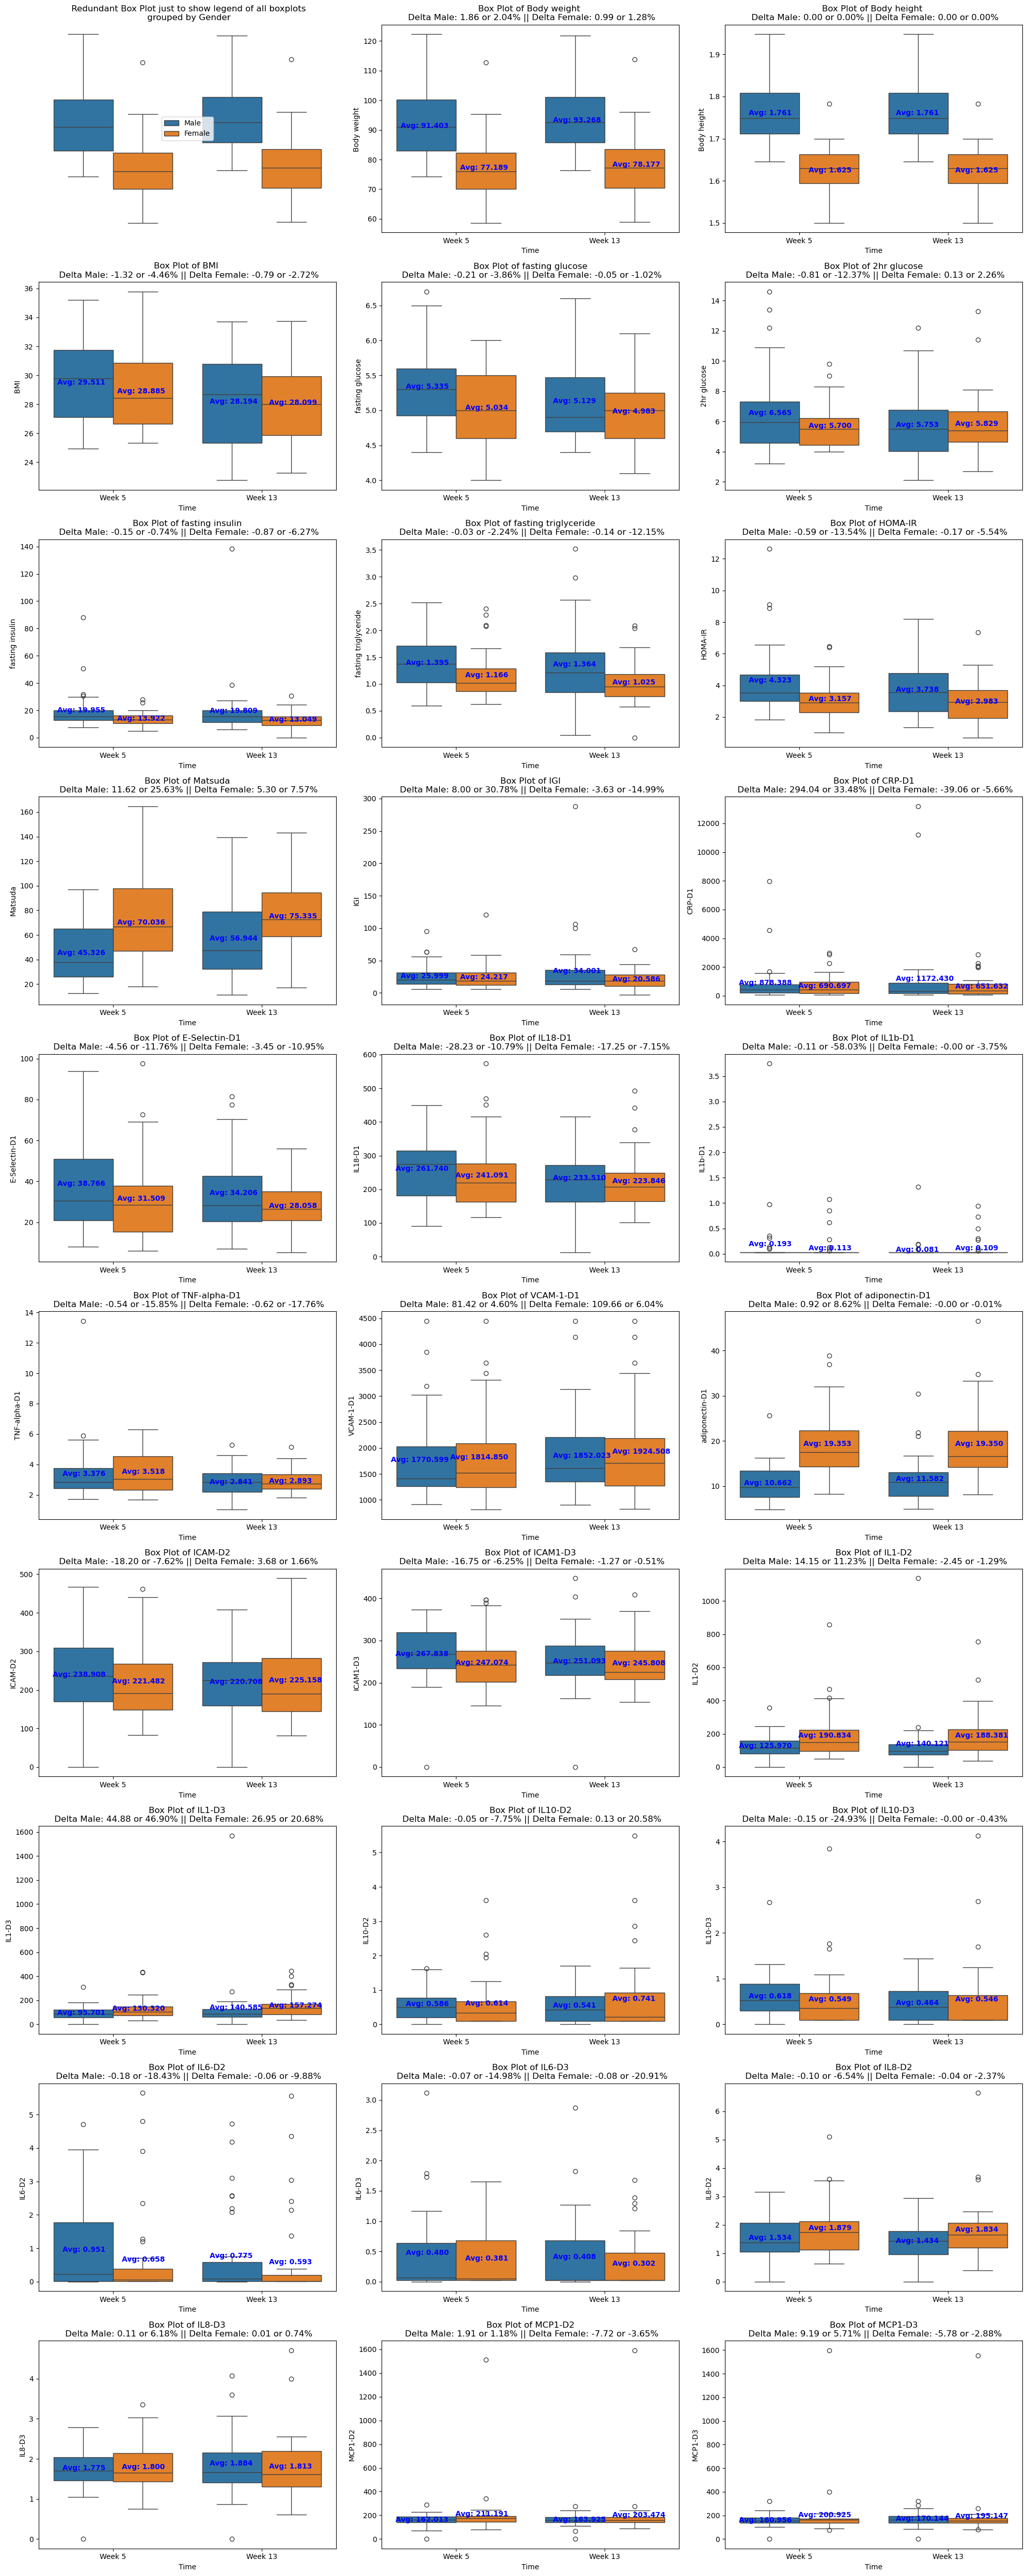

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python /NutriTech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)

# Ensure there are no duplicate columns
df_week5_before = df_week5_before.loc[:, ~df_week5_before.columns.duplicated()]
df_week13_after = df_week13_after.loc[:, ~df_week13_after.columns.duplicated()]

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                     'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                     'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                     'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3']

# Combine the two dataframes for easier plotting
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'
combined_df = pd.concat([df_week5_before, df_week13_after], ignore_index=True)

# Calculate the number of rows needed
n_columns = 3
n_rows = (len(columns_to_compare) + 1 + n_columns - 1) // n_columns

# Create figure with a specific size
plt.figure(figsize=(20, 5 * n_rows))

# Add an empty plot at the start for the legend
plt.subplot(n_rows, n_columns, 1)
plt.title(f' Redundant Box Plot just to show legend of all boxplots\n grouped by Gender')
sns.boxplot(x='Time', y=columns_to_compare[0], hue='Gender', data=combined_df)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='center')
plt.axis('off')

for i, column in enumerate(columns_to_compare, 2):
    plt.subplot(n_rows, n_columns, i)
    
    # Creating box plots
    box_plot = sns.boxplot(x='Time', y=column, hue='Gender', data=combined_df)
    
    # Calculate means
    group_means = combined_df.groupby(['Time', 'Gender'])[column].mean().unstack()

    # Remove the legend
    box_plot.get_legend().remove()
    
    # Calculate delta and percentage delta
    delta_male = group_means.loc['Week 13', 'Male'] - group_means.loc['Week 5', 'Male']
    delta_female = group_means.loc['Week 13', 'Female'] - group_means.loc['Week 5', 'Female']
    percentage_delta_male = (delta_male / group_means.loc['Week 5', 'Male']) * 100
    percentage_delta_female = (delta_female / group_means.loc['Week 5', 'Female']) * 100
    
    # Annotate averages and deltas within the plot 
    plt.text(-.05, group_means.loc['Week 5', 'Male'], f'Avg: {group_means.loc["Week 5", "Male"]:.3f}', horizontalalignment='right', verticalalignment='center', color='blue', weight='semibold')
    plt.text(.35, group_means.loc['Week 5', 'Female'], f'Avg: {group_means.loc["Week 5", "Female"]:.3f}', horizontalalignment='right', verticalalignment='center', color='blue', weight='semibold')
    plt.text(.65, group_means.loc['Week 13', 'Male'], f'Avg: {group_means.loc["Week 13", "Male"]:.3f}', horizontalalignment='left', verticalalignment='center', color='blue', weight='semibold')
    plt.text(1.05, group_means.loc['Week 13', 'Female'], f'Avg: {group_means.loc["Week 13", "Female"]:.3f}', horizontalalignment='left', verticalalignment='center', color='blue', weight='semibold')
      
    plt.title(f'Box Plot of {column}\n Delta Male: {delta_male:.2f} or {percentage_delta_male:.2f}% || Delta Female: {delta_female:.2f} or {percentage_delta_female:.2f}%')
    plt.xlabel('Time')
    plt.ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# plt.savefig('Boxplots of week 5 vs week 13 , both weeks split by Gender.png')

# Show the plot
plt.show()
